In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random
tf.set_random_seed(777)  # for reproducibility

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

# parameters
nb_classes = 10
num_epochs = 15
batch_size = 100
num_iterations = int(mnist.train.num_examples / batch_size)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [7]:
# MNIST data image of shape 28 * 28 = 784
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, nb_classes])

with tf.name_scope("Layer1"):
    W1 = tf.Variable(tf.random_normal([784, 300]), name="weight_1")
    b1 = tf.Variable(tf.random_normal([300]), name="bias_1")
    L1 = tf.sigmoid(tf.matmul(X, W1) + b1)
    
    tf.summary.histogram("W1", W1)
    tf.summary.histogram("b1", b1)
    tf.summary.histogram("L1", L1)

with tf.name_scope("Layer2"):
    W2 = tf.Variable(tf.random_normal([300, 300]), name="weight_2")
    b2 = tf.Variable(tf.random_normal([300]), name="bias_2")
    L2 = tf.sigmoid(tf.matmul(L1, W2) + b2)

    tf.summary.histogram("W2", W2)
    tf.summary.histogram("b2", b2)
    tf.summary.histogram("L2", L2)

with tf.name_scope("Layer3"):
    W3 = tf.Variable(tf.random_normal([300, nb_classes]), name="weight_3")
    b3 = tf.Variable(tf.random_normal([nb_classes]), name="bias_3")
    hypothesis = tf.matmul(L2, W3) + b3

    tf.summary.histogram("W3", W3)
    tf.summary.histogram("b3", b3)
    tf.summary.histogram("Hypothesis", hypothesis)


In [10]:
# Cost/Loss function
with tf.name_scope("Cost"):
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=hypothesis, labels=Y))
    tf.summary.scalar("Cost", cost)

with tf.name_scope("Train"):
    train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

# Accuracy
is_correct = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1)) # test model prediction
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32)) # calculate accuracy
tf.summary.scalar("accuracy", accuracy)

with tf.Session() as sess:
    # tensorboard --logdir=./logs/xor_logs
    merged_summary = tf.summary.merge_all()
    writer = tf.summary.FileWriter("F:/Jupyter_project/Logs/MNIST_logs")
    writer.add_graph(sess.graph)  # Show the graph

    sess.run(tf.global_variables_initializer())

    # Training
    for epoch in range(num_epochs):
        avg_cost = 0
        for i in range(num_iterations):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            _, cost_val = sess.run([train, cost], feed_dict={X: batch_xs, Y: batch_ys})
            avg_cost += cost_val / num_iterations
        
        print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

    print('Learning Finished')
    
    print('Accuracy:', sess.run(accuracy, feed_dict={X:mnist.test.images, Y:mnist.test.labels}))

Epoch: 0001 cost = 5.580026255
Epoch: 0002 cost = 2.689199883
Epoch: 0003 cost = 1.980395254
Epoch: 0004 cost = 1.641932360
Epoch: 0005 cost = 1.436561388
Epoch: 0006 cost = 1.295080209
Epoch: 0007 cost = 1.189014999
Epoch: 0008 cost = 1.106136429
Epoch: 0009 cost = 1.037714999
Epoch: 0010 cost = 0.980469387
Epoch: 0011 cost = 0.931372830
Epoch: 0012 cost = 0.889038367
Epoch: 0013 cost = 0.852214549
Epoch: 0014 cost = 0.819530203
Epoch: 0015 cost = 0.790237545
Learning Finished
Accuracy: 0.8002


Accuracy: 0.8064
Label:  [1]
Prediction:  [1]


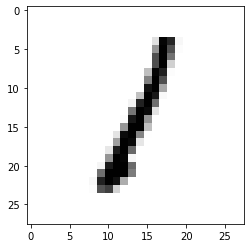

In [6]:
# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r : r + 1], 1)))
print(
    "Prediction: ",
    sess.run(tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r : r + 1]}),
)

plt.imshow(
    mnist.test.images[r : r + 1].reshape(28, 28),
    cmap="Greys",
    interpolation="nearest",
)
plt.show()